# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | melekeok village
Processing Record 2 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | itaituba
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | wewak
Processing Record 11 of Set 1 | khamis mushait
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | la passe
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | vernon
Processing Record 19 of Set 1 | kovdor
Processing Record 20 of Set 1 | banff
Processing Record 21 of Set 1 | yekaterinoslavka
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,melekeok village,7.4957,134.6367,303.46,70,75,3.60,PW,1706841808
1,port-aux-francais,-49.3500,70.2167,280.52,88,16,8.16,TF,1706841809
2,ushuaia,-54.8000,-68.3000,280.96,71,0,11.32,AR,1706841677
3,puerto natales,-51.7236,-72.4875,280.92,85,100,1.04,CL,1706841809
4,grytviken,-54.2811,-36.5092,276.09,71,6,4.00,GS,1706841810


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/chac/Desktop/Class/Module_6_Assignment/python_api_challenge/output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("/Users/chac/Desktop/Class/Module_6_Assignment/python_api_challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,melekeok village,7.4957,134.6367,303.46,70,75,3.60,PW,1706841808
1,port-aux-francais,-49.3500,70.2167,280.52,88,16,8.16,TF,1706841809
2,ushuaia,-54.8000,-68.3000,280.96,71,0,11.32,AR,1706841677
3,puerto natales,-51.7236,-72.4875,280.92,85,100,1.04,CL,1706841809
4,grytviken,-54.2811,-36.5092,276.09,71,6,4.00,GS,1706841810


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

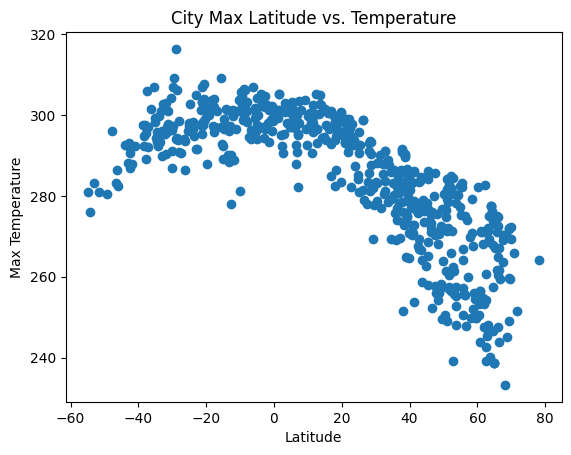

In [19]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("/Users/chac/Desktop/Class/Module_6_Assignment/python_api_challenge/output_data/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

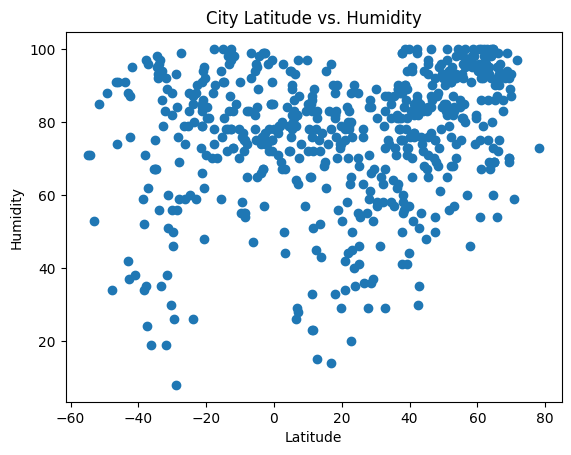

In [20]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("/Users/chac/Desktop/Class/Module_6_Assignment/python_api_challenge/output_data/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

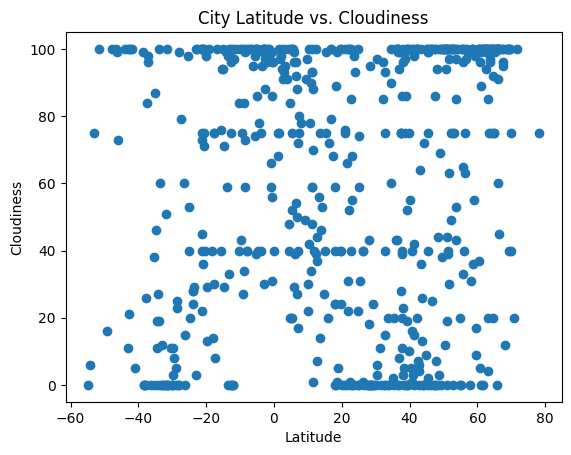

In [21]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("/Users/chac/Desktop/Class/Module_6_Assignment/python_api_challenge/output_data/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

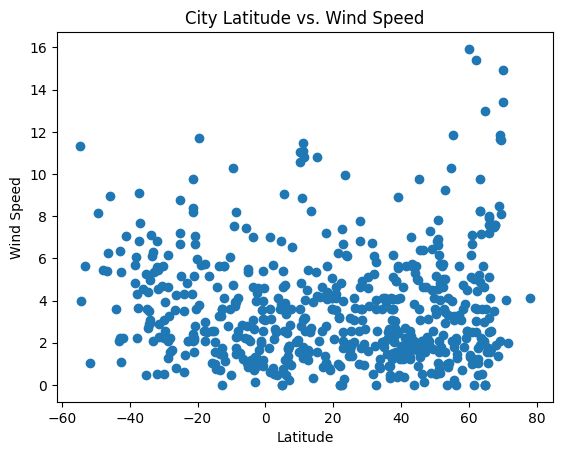

In [23]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("/Users/chac/Desktop/Class/Module_6_Assignment/python_api_challenge/output_data/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,melekeok village,7.4957,134.6367,303.46,70,75,3.60,PW,1706841808
7,wailua homesteads,22.0669,-159.3780,298.39,79,100,0.89,US,1706841810
9,khamis mushait,18.3064,42.7292,286.49,76,0,5.66,SA,1706841811
10,ilulissat,69.2167,-51.1000,249.16,70,40,2.06,GL,1706841811
13,la passe,45.5549,-0.8967,284.28,97,99,1.85,FR,1706841812


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <=0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,280.52,88,16,8.16,TF,1706841809
2,ushuaia,-54.8000,-68.3000,280.96,71,0,11.32,AR,1706841677
3,puerto natales,-51.7236,-72.4875,280.92,85,100,1.04,CL,1706841809
4,grytviken,-54.2811,-36.5092,276.09,71,6,4.00,GS,1706841810
5,itaituba,-4.2761,-55.9836,296.87,98,78,1.18,BR,1706841810


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6912505454461604


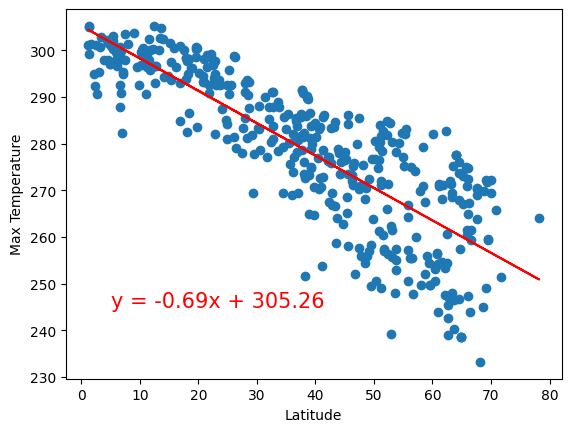

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,245),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.20489461577875673


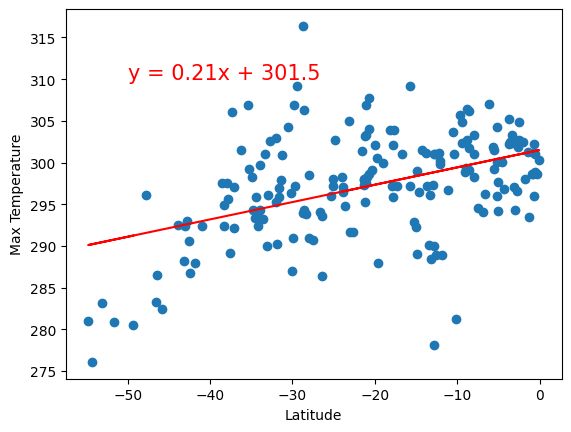

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 310),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** As Latitude increases in the Northern Hemisphere, the Max Temperature decrease. As Latitude increases in the Southern Hemisphere, the Max Temperature increases. This could be determined due to the relative proximity to the North and South Pole as well as the Equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12823827389197417


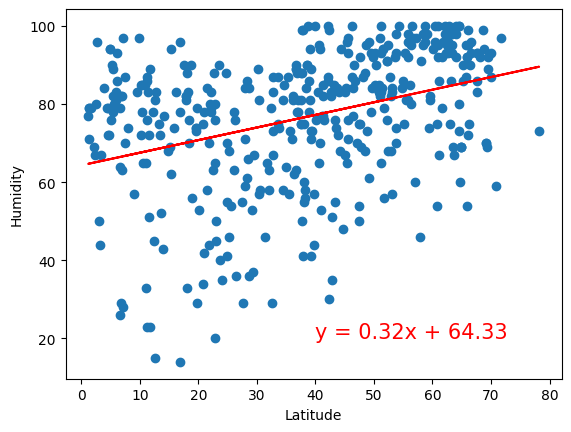

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.06350043036576285


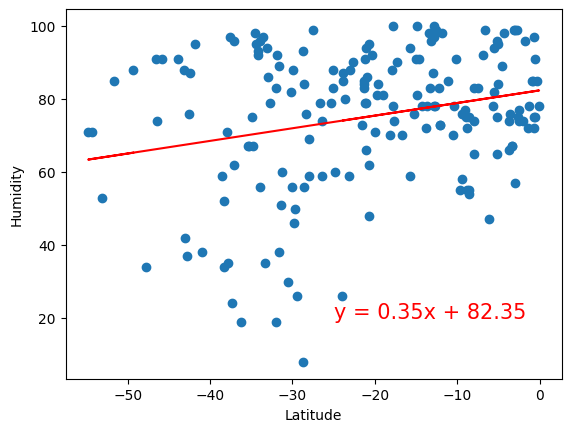

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemisphere, Latitude has no strong affect on the Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0250374149825846


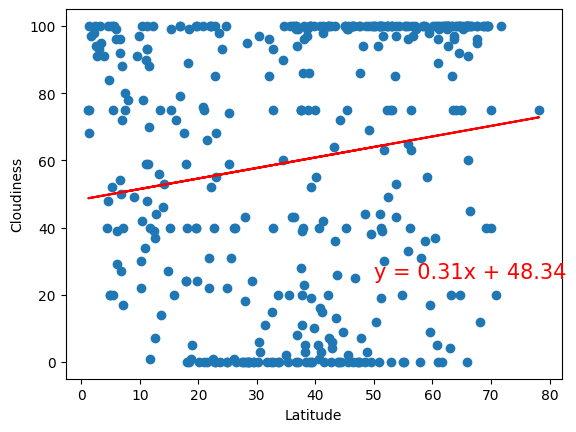

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.12831039073133202


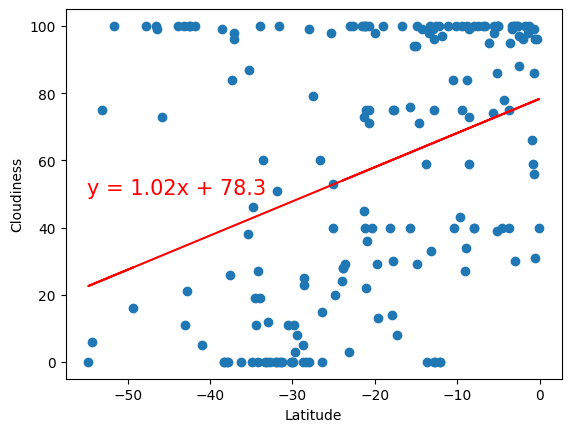

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern and Southern Hemisphere, Latitude has no real affect on the level of Cloudiness observable.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016328711958306357


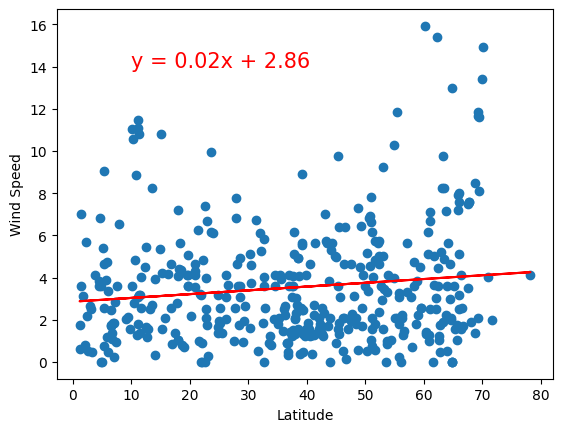

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.08638054623107666


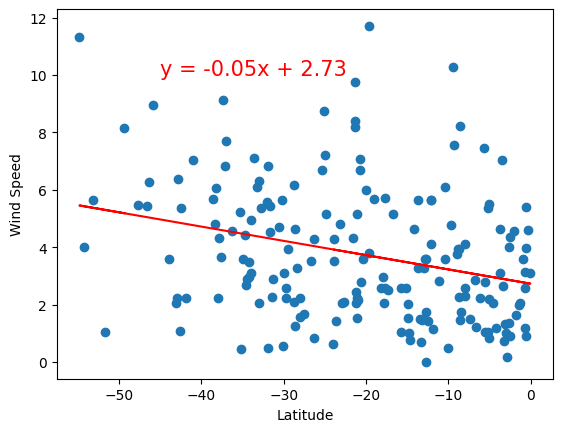

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45, 10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern and Southern Hemisphere, the Latitude has no strong affect on the Wind Speed observable.